# Statistics Introduction Applied to Data Science
## Lab : Seven
## Exploratory Data Analysis - Part Two

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #optional: for ggplot-like style

# To check the latest version of Matplotlib library.
print('Matplotlib version:', mpl.__version__) # >= 2.0.0

Matplotlib version: 3.4.2


In [2]:
import numpy as np
import pandas as pd

In [3]:
df_fat = pd.read_csv('data/Fat_Supply_Quantity_Data.csv')

In [37]:
df_fat.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,...,17.0831,0.3593,4.5,29.8,0.053472,0.000938,0.004929,0.047605,38042000.0,%
Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,...,9.2443,0.6503,22.3,6.2,0.043597,0.001190,0.032820,0.009587,2858000.0,%
Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,...,27.3606,0.5145,26.6,3.9,0.023393,0.001629,0.015475,0.006289,43406000.0,%
Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,...,22.4638,0.1231,6.8,25,0.000290,0.000013,0.000076,0.000200,31427000.0,%
Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,...,14.4436,0.2469,19.1,NaN,0.026804,0.003093,0.020619,0.003093,97000.0,%


In [5]:
# let's examine the types of the column labels
# We examine the data type of the column names and verify that they are type text (str)
all(isinstance(column, str) for column in df_fat.columns)

True

In [6]:
df_fat.shape

(170, 32)

In [7]:
# We delete the empty rows of the Obesity variable, using dropna.
df_fat.dropna(subset=["Obesity"], axis=0, inplace = True)
df_fat.shape

(167, 32)

In [8]:
# We make the country as the index of the dataframe to facilitate searches with loc method.
df_fat.set_index('Country', inplace = True)
df_fat.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,...,17.0831,0.3593,4.5,29.8,0.053472,0.000938,0.004929,0.047605,38042000.0,%
Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,...,9.2443,0.6503,22.3,6.2,0.043597,0.001190,0.032820,0.009587,2858000.0,%
Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,...,27.3606,0.5145,26.6,3.9,0.023393,0.001629,0.015475,0.006289,43406000.0,%
Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,...,22.4638,0.1231,6.8,25,0.000290,0.000013,0.000076,0.000200,31427000.0,%
Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,...,14.4436,0.2469,19.1,NaN,0.026804,0.003093,0.020619,0.003093,97000.0,%


In [9]:
df_fat['Obesity'].head(10)

Country
Afghanistan             4.5
Albania                22.3
Algeria                26.6
Angola                  6.8
Antigua and Barbuda    19.1
Argentina              28.5
Armenia                20.9
Australia              30.4
Austria                21.9
Azerbaijan             19.9
Name: Obesity, dtype: float64

## Histogram

<AxesSubplot:ylabel='Frequency'>

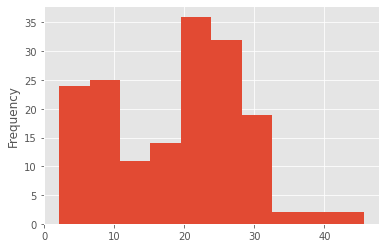

In [10]:
# An easy way to create the histogram.
df_fat['Obesity'].plot.hist()

In [11]:
# np.histogram returns 2 values as lists. 
# The first list contains count or frequency of the variable.
# The second list contains the class ranges.

count, bin_edges = np.histogram(df_fat['Obesity'])

print(count) # Number of frequencies
print(bin_edges) # class range, by default: 10 bins

[24 25 11 14 36 32 19  2  2  2]
[ 2.1   6.45 10.8  15.15 19.5  23.85 28.2  32.55 36.9  41.25 45.6 ]


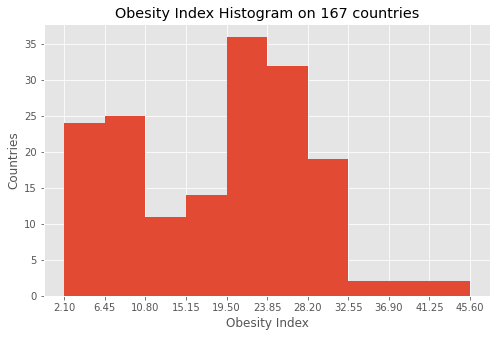

In [12]:
# With the parameter kind = 'hist' we indicate that we want to graph a histogram.
# With the figsize parameter we indicate the size of the graph.
# In the xticks parameter we indicate our class range. Notice that bin_edges is the second value returned by np.histogram.
# With the title method we specify a title to the chart.
# With the ylabel and xlabel methods we specify titles to the axes.

df_fat['Obesity'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title('Obesity Index Histogram on 167 countries')
plt.ylabel('Countries')
plt.xlabel('Obesity Index')

plt.show()

### Applying empirical criteria to determine class number and rank

In [13]:
# From 1 to 16
for i in range(1,16):
    class_count = i
    # If the value of 2 raised to i is greater than the number of observations, we are done.
    if 2 ** i > df_fat.shape[0]:
       break

# We apply the formula to calculate the class range.
class_range = (df_fat['Obesity'].max() - df_fat['Obesity'].min())/class_count

# print results.
print('class count: ', class_count)
print('class: range ', class_range)

# Minimum and Maximum Obesity Index.
print('Minimum: ', df_fat['Obesity'].min())
print('Maximum: ', df_fat['Obesity'].max())

class count:  8
class: range  5.4375
Minimum:  2.1
Maximum:  45.6


### We create our own class range

In [14]:
# We adjust the number of classes.
num_bin = 9

# We adjust the class range
class_range = 5

# In this list we save the class ranges.
new_bin = []

# In this list we keep the number of countries.
ncount = []

# Initializing range values.
begin_value = 0
end_value = 2
new_bin.append(end_value)

# Cycle to get class range.
for i in range(num_bin):
    # Increments the final value by the value of the class range.
    end_value += class_range
    
    # Save the new range to the class list.
    new_bin.append(end_value)

    # We count the number of countries within the class range.
    ncount.append(df_fat[(df_fat['Obesity'] >= begin_value) & (df_fat['Obesity'] < end_value)].shape[0])
    
    # The new starting value is the ending value.
    begin_value = end_value

print('Countries count: ', ncount)
print('Class count:', new_bin)

Countries count:  [29, 23, 12, 24, 47, 23, 5, 2, 2]
Class count: [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]


### We use our custom class range to build the Histogram.

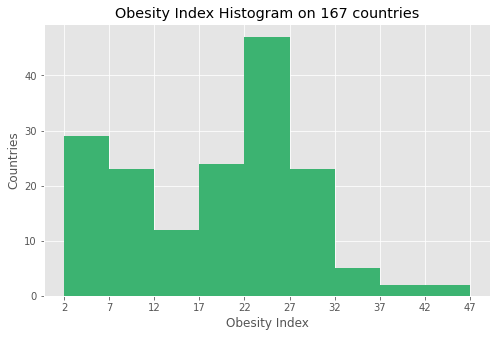

In [15]:
# In parameters bins y xticks we specify our custom class range "new_bin".

count, bin_edges = np.histogram(df_fat['Obesity'], num_bin)

df_fat['Obesity'].plot(kind = 'hist',
                       figsize = (8,5),
                       bins = new_bin,
                       xticks = new_bin,
                       color ='mediumseagreen'
                      )

plt.title('Obesity Index Histogram on 167 countries')
plt.ylabel('Countries')
plt.xlabel('Obesity Index')

plt.show()

Notice that the x-axis labels correspond to our custom class range. Some symmetry is seen in the distribution of the obesity rate if we compare the index ranges from 12 to 37.

The largest group corresponds to countries that maintain an obesity rate between 22 and 27. According to the BMI classification table, this group made up of 47 countries is in a degree of pre-obesity. This is not very good news for health systems in general.


In [16]:
# Let's explore the column names of our dataframe
df_fat.columns.values

array(['Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products',
       'Vegetable Oils', 'Vegetables', 'Obesity', 'Undernourished',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population',
       'Unit (all except Population)'], dtype=object)

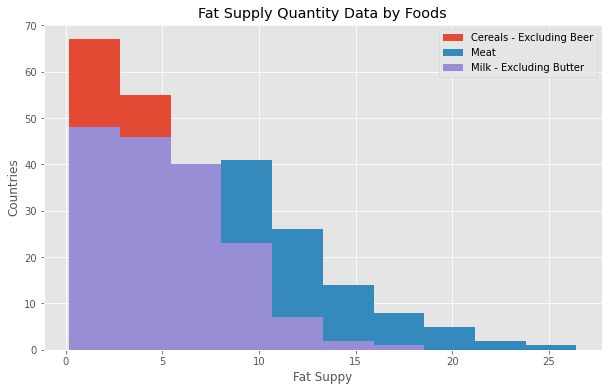

In [17]:
# We can build histogram with multiple variables.
df_fat[['Cereals - Excluding Beer','Meat', 'Milk - Excluding Butter']].plot(kind='hist', figsize=(10,6))

plt.title('Fat Supply Quantity Data by Foods')
plt.ylabel('Countries')
plt.xlabel('Fat Suppy')

plt.show()

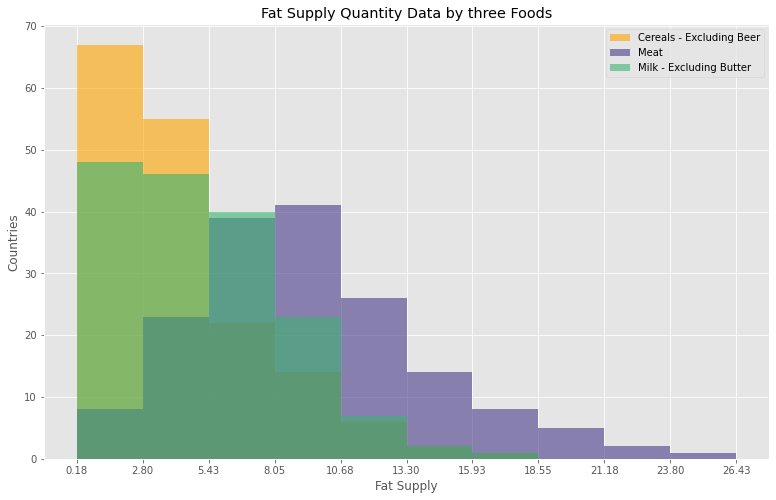

In [18]:
# We define a new dataframe called df_three with our three variables of interest.
# With np.histogram we obtain the frequencies and the class range.

df_three = df_fat[['Cereals - Excluding Beer','Meat','Milk - Excluding Butter']]
count, bin_edges = np.histogram(df_three, 10)

#un-staked histogram
df_three.plot(kind = 'hist',
             figsize=(13, 8),
             bins = 10,
             alpha=0.6,
             xticks=bin_edges,
             color=['Orange','darkslateblue','mediumseagreen']
            )

plt.title('Fat Supply Quantity Data by three Foods')
plt.ylabel('Countries')
plt.xlabel('Fat Supply')

plt.show()

Both cereals and milk show a positive asymmetric distribution, which indicates that the fat intake from these sources is very low. Notice how different is the distribution of fat from meat, which on average contributes between 5.43 and 10.68 percent, in around 80 countries.

### Practice One:

Construct a frequency histogram with the variables: Eggs and Fish, Seafood.
What can be said about their distributions?

In [ ]:
# Type your code here


## Pearson's correlation coefficient and p value.

We need the scipy stats library for the correlation coefficient.

In [19]:
from scipy import stats

### Let's explore some relationships of sources fat vs. obesity.

Meat vs Obesity.

In [20]:
pearson_coef, p_value = stats.pearsonr(df_fat['Meat'], df_fat['Obesity'])
print("Pearson's correlation coefficient: ", pearson_coef, " p value: ", p_value)

if p_value < 0.001:
    print("High certainty")
elif p_value < 0.05:
    print("Moderate certainty")
elif p_value < 0.1:
    print("Low certainty")
else:
    print("Lack of certainty")


Pearson's correlation coefficient:  0.21991902377261702  p value:  0.00429447433848602
Moderate certainty


Animal Products vs Obesity.

In [21]:
pearson_coef, p_value = stats.pearsonr(df_fat['Animal Products'], df_fat['Obesity'])
print("Pearson's correlation coefficient: ", pearson_coef, " p value: ", p_value)

if p_value < 0.001:
    print("High certainty")
elif p_value < 0.05:
    print("Moderate certainty")
elif p_value < 0.1:
    print("Low certainty")
else:
    print("ALack of certainty")


Pearson's correlation coefficient:  0.4174898598640965  p value:  1.9873369451159758e-08
High certainty


To analyze several coefficients it is better to construct a correlation matrix. We do this with corr() method

In [22]:
df_fat[['Animal Products','Meat','Cereals - Excluding Beer','Sugar & Sweeteners','Obesity']].corr()

,Animal Products,Meat,Cereals - Excluding Beer,Sugar & Sweeteners,Obesity
Animal Products,1.000000,0.738702,-0.459064,-0.016549,0.417490
Meat,0.738702,1.000000,-0.270603,0.095534,0.219919
Cereals - Excluding Beer,-0.459064,-0.270603,1.000000,-0.003046,-0.488142
Sugar & Sweeteners,-0.016549,0.095534,-0.003046,1.000000,-0.163192
Obesity,0.417490,0.219919,-0.488142,-0.163192,1.000000


We can import the pandas scatter_matrix library to obtain the same correlation matrix but graphically. The relationship between variables is shown with a scatter plot. The relationship between the same variable is shown with a frequency histogram. This allows us to analyze its shape.

In [23]:
from pandas.plotting import scatter_matrix

C:\Users\NavavitPonganan\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


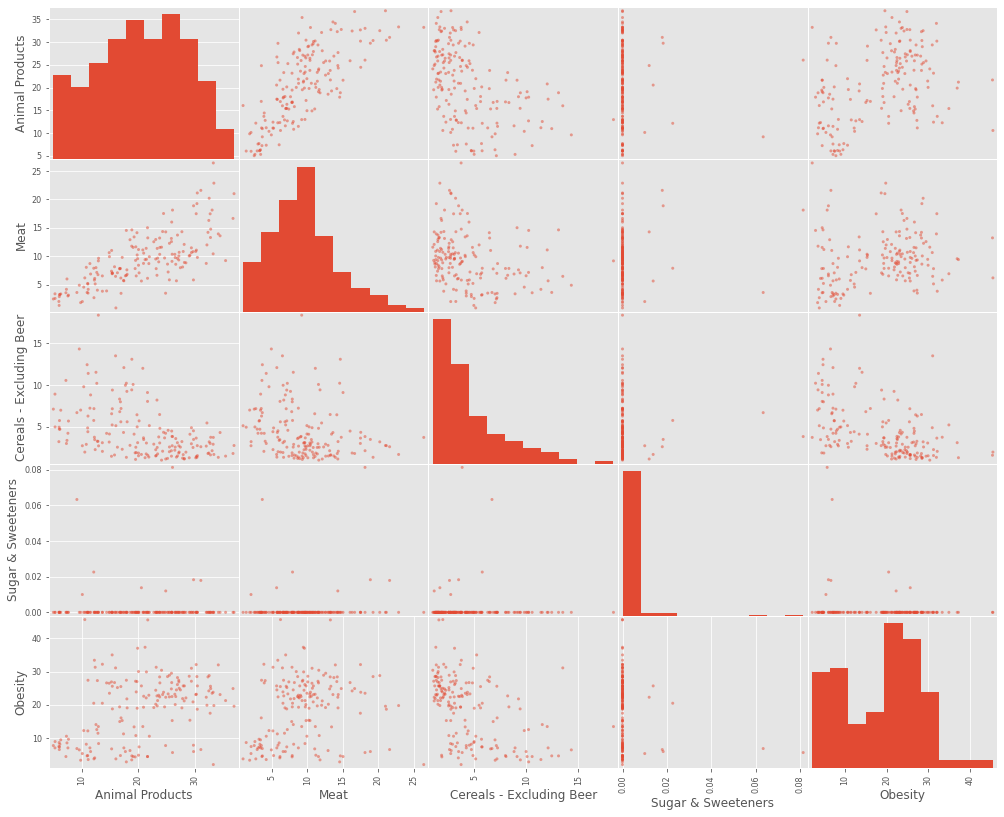

In [24]:
scatter_matrix(df_fat[['Animal Products','Meat','Cereals - Excluding Beer','Sugar & Sweeteners','Obesity']], figsize = (17,14))
plt.show()

We therefore see the distributions of each variable in a single graph and we can quickly detect if any pattern or trend is observed when we cross their values using the scatter plot. The most interesting correlations, whether we look at the correlation matrix or the scatter matrix, are between the variables: Obesity with Cereals and Meat with Animal Products.

## Regression Plot

To obtain the regression plot easy and fast we use the Seaborn library. Let's make the regression plot of the most strongly correlated variables of the set of variables identified in the previous analysis.

In [25]:
import seaborn as sns
%matplotlib inline

Animal Products vs. Meat.

<AxesSubplot:xlabel='Animal Products', ylabel='Meat'>

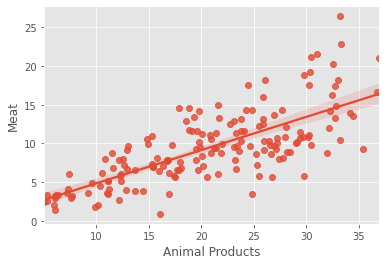

In [26]:
sns.regplot(x = "Animal Products", y = "Meat", data = df_fat)

Cereals vs. Obesity.

(0.0, 48.310392846538875)

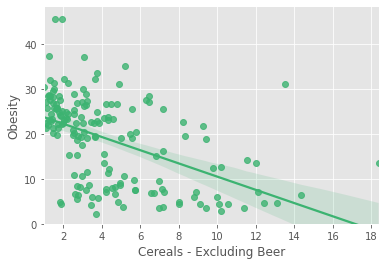

In [27]:
sns.regplot(x = "Cereals - Excluding Beer", y = "Obesity", data = df_fat, color = 'mediumseagreen')
plt.ylim(0,)

Code to increase the size of the regression plot.

(0.0, 48.35751018372838)

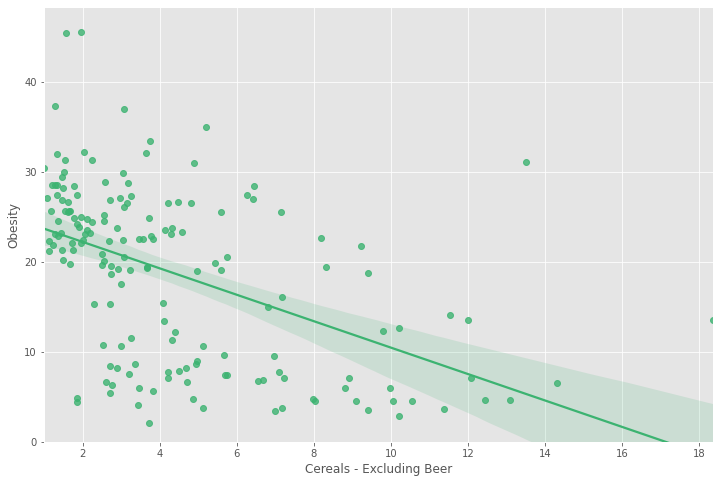

In [28]:
plt.figure(figsize = (12, 8))
ax = sns.regplot(x = "Cereals - Excluding Beer", y = "Obesity", data = df_fat, color = 'mediumseagreen')
plt.ylim(0,)

### Practice Two:
Build:

* Correlation matrix with the variables Eggs, Fish Seafood and Obesity.
* Regression plot with the variables Eggs and Obesity.
* Regression plot with the variables Fish, Seafood and Obesity.
* Which of the two sources of fat is more correlated with Obesity?

Remember, obesity is the dependent variable.

In [29]:
# Type your code here


We load a new dataset for the following analyzes. The new dataset corresponds to the suicides that occurred worldwide, from 1987 to 2014.

In [30]:
df_suicide = pd.read_csv('data/suicide.csv')

In [31]:
df_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


<h3>Analysis of Variance (ANOVA)</h3>

<p>Analysis of variance, as we have seen, is a statistical method that can be used to verify whether there are significant differences between the means of two or more groups. Analysis of variance returns two values: </p>

<p><b>F statistic</b>: ANOVA assumes that the means of all groups are the same until proven otherwise. Then calculate how much the real means deviate from the assumption. This is indicated by the F statistic. The larger the value of F, the greater the difference between the means.</p>

<p><b>p value</b>: p value tells us how statistically significant the F value is.</p>

<p>We will do an analysis of variance with the variables generation and number of suicides. The objective of the test is to determine if there is any correlation between generational groups and the number of suicides.</p>

<p>If our generation variable is strongly correlated with the number of suicides, the ANOVA test will return a high score in the F statistic and a small p value.</p>

In [32]:
# We take only the variables generation and suicides_no.
df_suic_group = df_suicide[['generation','suicides_no']]
df_suic_group.head()

,generation,suicides_no
0,Generation X,21
1,Silent,16
2,Generation X,14
3,G.I. Generation,1
4,Boomers,9


In [33]:
# A brief summary of the generations
df_suic_group.groupby(['generation'], as_index = False).count()

,generation,suicides_no
0,Boomers,4990
1,G.I. Generation,2744
2,Generation X,6408
3,Generation Z,1470
4,Millenials,5844
5,Silent,6364


First we group by the categorical variable generation.

In [34]:
group_df_suicide = df_suicide[['generation', 'suicides_no']].groupby(['generation'])
group_df_suicide.head(2)

,generation,suicides_no
0,Generation X,21
1,Silent,16
2,Generation X,14
3,G.I. Generation,1
4,Boomers,9
5,G.I. Generation,1
6,Silent,6
7,Boomers,4
44,Millenials,0
46,Millenials,0


We can get the values of the groups using the get_group method.
So, for instance if I want the group values Millenials:

In [35]:
group_df_suicide.get_group('Millenials')['suicides_no']

44         0
46         0
57         1
58         1
70         1
        ... 
27802    146
27809    318
27810    347
27812    347
27814    162
Name: suicides_no, Length: 5844, dtype: int64

Now that we know how to create the groups and obtain their values, we are going to use the f_oneway method of the stats library to perform our analysis of variance. Let's do it for all generations.


In [36]:
f_val, p_val = stats.f_oneway(group_df_suicide.get_group('Boomers')['suicides_no'], 
                              group_df_suicide.get_group('G.I. Generation')['suicides_no'], 
                              group_df_suicide.get_group('Generation X')['suicides_no'],
                              group_df_suicide.get_group('Generation Z')['suicides_no'],
                              group_df_suicide.get_group('Millenials')['suicides_no'], 
                              group_df_suicide.get_group('Silent')['suicides_no'])
 
print( "ANOVA Result: F=", f_val, ", P =", p_val)


ANOVA Result: F= 109.21258765046143 , P = 1.2398442541832577e-114


A very interesting result. It turns out that generational groups are strongly correlated with the incidence of suicide worldwide in the years of the study. But will it be all or just some of them?


### Practice Three:

Identify among all generational groups:
* Which of them is more correlated with the incidence of suicides?
* Which of them is least correlated?
* What is the significance for these?


In [ ]:
# Type your code here
